![](img/330-banner.png)

# Applied Machine Learning 

MTU Spring 24

Instructor: Abel Reyes

## Imports

In [1]:
import glob
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#import graphviz
import IPython
#import mglearn
from IPython.display import HTML, display
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

plt.rcParams["font.size"] = 16
pd.set_option("display.max_colwidth", 200)

## Learning outcomes 
From this lecture, you will be able to 

- explain the motivation to study machine learning;
- explain supervised machine learning; 
- navigate through the course material;
- be familiar with the policies and how the class is going to run; 

### You all

- Since we're going to spend the semester with each other, I would like to know you a bit better. 
- Please fill out [Getting to know you survey](https://mtu.instructure.com/) when you get a chance. (Online)

- Go to our course webpage: 

> https://github.com/areyesan/EET4501---SP24

- Follow the link to Course Jupyter book

> https://mtu.instructure.com/courses/1478789

You'll see the lecture notes rendered as PDF files there. 

```
IMPORTANT
You are welcome to ask questions by raising your hand.
There is also [a reflection Google Document]https://docs.google.com/document/d/1XdOFcXSn-Vhi9oUnA81mk-bAhJYkWbHEn4JMIQJzt78/edit?usp=sharing) for this course for your questions/comments/reflections. It will be great if you can write about your takeaways, struggle points, and general comments in this document so that I'll try to address those points in the next lecture. 
```

## What is ML?
<!-- <img src="img/ml_stat.jpg" height="1000" width="1000">  -->
![](img/ml_stat.jpg)


Machine learning is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can effectively generalize and thus perform tasks without explicit instructions.

## Why machine learning (ML)? 

```{seealso}
Check out [From Machine Learning to Autonomous Intelligence ](https://www.youtube.com/watch?v=pd0JmT6rYcI&pp=ygUfd2h5IG1hY2hpbmUgbGVhcm5pbmcgeWFubiBsZWN1bg%3D%3D)- on this material. 
```

### Prevalence of ML

Let's look at some examples. 


<!-- <img src="img/ml-examples.png" height="1000" width="1000">  -->
![](img/ml-examples.png)

- Image sources 
    - [Voice assistants](https://geeksfl.com/blog/best-voice-assistant/)
    - [Google News](https://news.google.com)    
    - [Recommendation systems](https://en.wikipedia.org/wiki/Recommender_system)
    - [Face Recognition source](https://startupleague.online/blog/3dss-tech-facial-recognition-technology/)
    - [Auto-completion](https://9to5google.com/2020/08/10/android-11-autofill-keyboard/)
    - [Stock market prediction](https://hbr.org/2019/12/what-machine-learning-will-mean-for-asset-managers)    
    - [Character recognition](https://en.wikipedia.org/wiki/Handwriting_recognition)    
    - [AlphaGo](https://deepmind.com/alphago-china)
    - [Self-driving cars](https://mc.ai/artificial-intelligence-in-self-driving-cars%E2%80%8A-%E2%80%8Ahow-far-have-we-gotten/)
    - [Drug discovery](https://www.nature.com/articles/d41586-018-05267-x)
    - [Cancer detection](https://venturebeat.com/2018/10/12/google-ai-claims-99-accuracy-in-metastatic-breast-cancer-detection/)

### Saving time and scaling products 

- Imagine writing a program for spam identification, i.e., whether an email is spam or non-spam. 
- Traditional programming 
    - Come up with rules using human understanding of spam messages. 
    - Time consuming and hard to come up with robust set of rules. 
- Machine learning
    - Collect large amount of data of spam and non-spam emails and let the machine learning algorithm figure out rules. 
- With machine learning, you're likely to 
    - Save time 
    - Customize and scale products 

## Supervised machine learning 

### Types of machine learning

Here are some typical learning problems. 

- **Supervised learning** ([Gmail spam filtering](https://support.google.com/a/answer/2368132?hl=en))
    - Training a model from input data and its corresponding targets to predict targets for new examples.     
- Unsupervised learning ([Google News](https://news.google.com/))
    - Training a model to find patterns in a dataset, typically an unlabeled dataset.
- Reinforcement learning ([AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far))
    - A family of algorithms for finding suitable actions to take in a given situation in order to maximize a reward. 
- Recommendation systems ([Amazon item recommendation system](https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf))
    - Predict the "rating" or "preference" a user would give to an item.    

### What is supervised machine learning (ML)? 

- Training data comprises a set of observations ($X$) and their corresponding targets ($y$). 
- We wish to find a model function $f$ that relates $X$ to $y$.
- We use the model function to predict targets of new examples. 

<!-- ![](img/sup-learning.png) -->
<img src="img/sup-learning.png" height="600" width="600"> 


### Example: Predict whether a message is spam or not 

#### Input features $X$ and target $y$

```{note}
Do not worry about the code and syntax for now. 
```

```{note}
Download SMS Spam Collection Dataset from [here](https://www.kaggle.com/uciml/sms-spam-collection-dataset). 
```

#### Training a supervised machine learning model with $X$ and $y$

In [2]:
sms_df = pd.read_csv("data/spam.csv", encoding="latin-1")
sms_df = sms_df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
sms_df = sms_df.rename(columns={"v1": "target", "v2": "sms"})
train_df, test_df = train_test_split(sms_df, test_size=0.10, random_state=42)
HTML(train_df.head().to_html(index=False))

target,sms
spam,"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."
ham,"Aight, I'll hit you up when I get some cash"
ham,Don no da:)whats you plan?
ham,Going to take your babe out ?
ham,No need lar. Jus testing e phone card. Dunno network not gd i thk. Me waiting 4 my sis 2 finish bathing so i can bathe. Dun disturb u liao u cleaning ur room.


In [3]:
X_train, y_train = train_df["sms"], train_df["target"]
X_test, y_test = test_df["sms"], test_df["target"]

clf = Pipeline(
    [
        ("vect", CountVectorizer(max_features=5000)),
        ("clf", LogisticRegression(max_iter=5000)),
    ]
)
clf.fit(X_train, y_train);

#### Predicting on unseen data using the trained model

In [4]:
pd.DataFrame(X_test[0:4])

,sms
3245,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens"
944,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one m..."
1044,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p"
2484,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.


In [5]:
pd.DataFrame(y_test[0:4])

,target
3245,ham
944,ham
1044,spam
2484,ham


```{note}
Do not worry about the code and syntax for now. 
```

In [6]:
pred_dict = {
    "sms": X_test[0:4],
    "spam_predictions": clf.predict(X_test[0:4]),
}
pred_df = pd.DataFrame(pred_dict)
pred_df.style.set_properties(**{"text-align": "left"})

,sms,spam_predictions
3245,"Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens",ham
944,"I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones",ham
1044,"We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p",spam
2484,Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.,ham


**We have accurately predicted labels for the unseen text messages above!**

<br><br>

### (Supervised) machine learning: popular definition 
<blockquote>
A field of study that gives computers the ability to learn without being explicitly programmed. <br> -- Arthur Samuel (1959)
</blockquote>

ML is a different way to think about problem solving.

![](img/traditional-programming-vs-ML.png)
<!-- <img src="img/traditional-programming-vs-ML.png" height="700" width="700">  -->

### Examples

Let's look at some concrete examples of supervised machine learning. 

```{note}
Do not worry about the code at this point. Just focus on the input and output in each example.
```

#### Example 1: Predicting whether a patient has a liver disease or not

##### Input data

Suppose we are interested in predicting whether a patient has the disease or not. We are given some tabular data with inputs and outputs of liver patients, as shown below. The data contains a number of input features and a special column called "Target" which is the output we are interested in predicting. 

```{note}
Download the data from [here](https://www.kaggle.com/uciml/indian-liver-patient-records). 
```

In [15]:
df = pd.read_csv("data/indian_liver_patient.csv")
df = df.drop(columns = ["Gender"])
df["Dataset"] = df["Dataset"].replace(1, "Disease")
df["Dataset"] = df["Dataset"].replace(2, "No Disease")
df.rename(columns={"Dataset": "Target"}, inplace=True)
train_df, test_df = train_test_split(df, test_size=4, random_state=42)
HTML(train_df.head().to_html(index=False))

Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
40,14.5,6.4,358,50,75,5.7,2.1,0.50,Disease
33,0.7,0.2,256,21,30,8.5,3.9,0.80,Disease
24,0.7,0.2,188,11,10,5.5,2.3,0.71,No Disease
60,0.7,0.2,171,31,26,7.0,3.5,1.00,No Disease
18,0.8,0.2,199,34,31,6.5,3.5,1.16,No Disease


##### Building a supervise machine learning model

Let's train a supervised machine learning model with the input and output above. 

In [16]:
#from lightgbm.sklearn import LGBMClassifier
from lightgbm import LGBMClassifier
X_train = train_df.drop(columns=["Target"])
y_train = train_df["Target"]
X_test = test_df.drop(columns=["Target"])
y_test = test_df["Target"]
model = LGBMClassifier(random_state=123)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 166, number of negative: 413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 579, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.286701 -> initscore=-0.911460
[LightGBM] [Info] Start training from score -0.911460
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=123)

##### Model predictions on unseen data

- Given features of new patients below we'll use this model to predict whether these patients have the liver disease or not. 

In [17]:
HTML(X_test.reset_index(drop=True).to_html(index=False))

Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
19,1.4,0.8,178,13,26,8.0,4.6,1.30
12,1.0,0.2,719,157,108,7.2,3.7,1.00
60,5.7,2.8,214,412,850,7.3,3.2,0.78
42,0.5,0.1,162,155,108,8.1,4.0,0.90


In [18]:
pred_df = pd.DataFrame({"Predicted_target": model.predict(X_test).tolist()})

df_concat = pd.concat([pred_df, X_test.reset_index(drop=True)], axis=1)
HTML(df_concat.to_html(index=False))

Predicted_target,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
No Disease,19,1.4,0.8,178,13,26,8.0,4.6,1.30
Disease,12,1.0,0.2,719,157,108,7.2,3.7,1.00
Disease,60,5.7,2.8,214,412,850,7.3,3.2,0.78
Disease,42,0.5,0.1,162,155,108,8.1,4.0,0.90


<br><br>

In [19]:
y_test

355    No Disease
407       Disease
90        Disease
402       Disease
Name: Target, dtype: object

#### Example 2: Predicting the label of a given image 

Suppose you want to predict the label of a given image using supervised machine learning. We are using a pre-trained model here to predict labels of new unseen images. 

```{note}
Assuming that you have successfully created SAT4510 `conda` environment on your computer, you'll have to install `torchvision` in SAT4510 `conda` environment to run the following code. If you are unable to install `torchvision` on your laptop, please don't worry at this point. It's not crucial at this point. 

> conda activate SAT4510
> conda install -c pytorch torchvision
```

In [7]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np

In [8]:
model = VGG16(weights='imagenet')

(224, 224, 3)


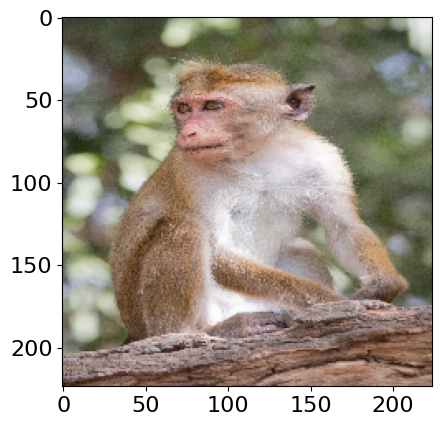

1/1 [==============================] - 34s 34s/step
1: macaque (0.95)
2: patas (0.03)
3: titi (0.01)
4: guenon (0.00)
5: proboscis_monkey (0.00)
(224, 224, 3)


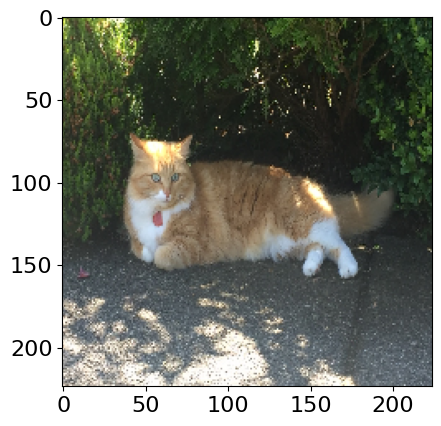

1/1 [==============================] - 0s 17ms/step
1: tabby (0.52)
2: tiger_cat (0.31)
3: Egyptian_cat (0.08)
4: doormat (0.03)
5: lynx (0.01)
(224, 224, 3)


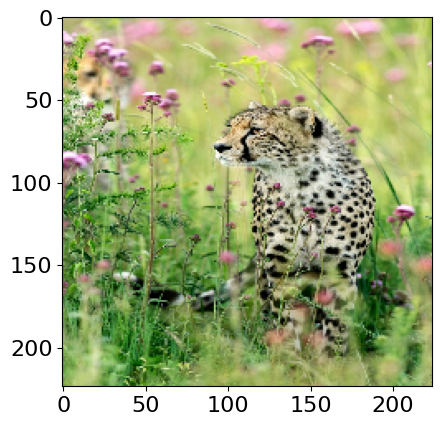

1/1 [==============================] - 0s 18ms/step
1: cheetah (1.00)
2: leopard (0.00)
3: jaguar (0.00)
4: snow_leopard (0.00)
5: lynx (0.00)
(224, 224, 3)


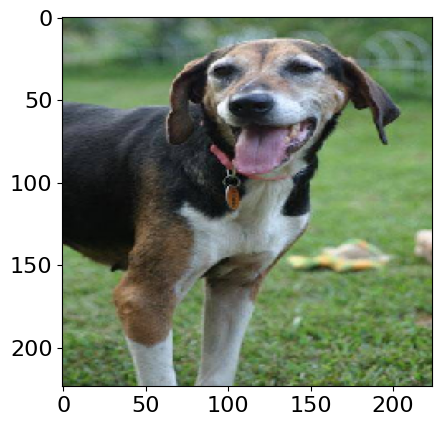

1/1 [==============================] - 0s 18ms/step
1: Walker_hound (0.52)
2: English_foxhound (0.29)
3: beagle (0.14)
4: bluetick (0.02)
5: EntleBucher (0.01)
(224, 224, 3)


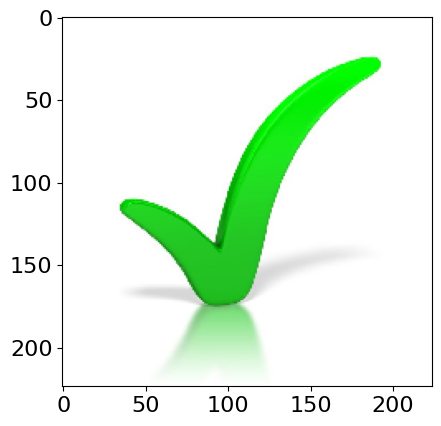

1/1 [==============================] - 0s 19ms/step
1: hook (0.08)
2: hair_slide (0.08)
3: pinwheel (0.06)
4: shovel (0.05)
5: cup (0.04)


In [7]:
images_paths = glob.glob("data/test_images/*.*")
for path in images_paths:
    img_path = path
    img = load_img(img_path, target_size=(224, 224))

    img_array = img_to_array(img)
    print(img_array.shape)
    plt.imshow(img_array/255.)
    plt.show()
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
        print(f"{i + 1}: {label} ({score:.2f})")


#### Example 3: Predicting sentiment expressed in a movie review

Suppose you are interested in predicting whether a given movie review is positive or negative. You can do it using supervised machine learning. 

```{note}
Download the data from [here](https://www.kaggle.com/utathya/imdb-review-dataset). 
```

In [9]:
imdb_df = pd.read_csv("data/imdb_master.csv", encoding="ISO-8859-1")
imdb_df = imdb_df[imdb_df["label"].str.startswith(("pos", "neg"))]
imdb_df = imdb_df.drop(columns = ["Unnamed: 0", "type", "file"])
imdb_df.rename(columns={"label": "target"}, inplace=True)
train_df, test_df = train_test_split(imdb_df, test_size=0.10, random_state=123)
HTML(train_df.head().to_html(index=False))

review,target
"It may have been inevitable that with the onslaught of ""slasher"" movies in the early 1980's, that a few good ones might slip through the cracks. This is a great ""rare"" film from Jeff Lieberman, who insured his cult status with his memorable 1970's films ""Squirm"" and ""Blue Sunshine"".<br /><br />Five young people head into the Oregon mountains (this movie was actually shot on location) to do some camping and check out the deed to some land that one of them has acquired. Before long, they will predictably be terrorized by a bulky killer with an incredibly creepy wheezing laugh.<br /><br />""Just Before Dawn"" is noticeably more ambitious, ""arty"", and intelligent than some slasher films. Lieberman actually fleshes out the characters - well, two of them, anyway - as much as a 90-minute-long film will allow him. The film has genuine moments of suspense and tension, and actually refrains from graphic gore, save for one killing right at the beginning.<br /><br />There is an above-average cast here, including Oscar winner George Kennedy, as a forest ranger who's understandably gone a little flaky from having been alone in the wilderness for too long. Jack Lemmon's son Chris, future Brian De Palma regular Gregg Henry, blonde lead Deborah Benson (it's too bad she hasn't become a more well-known performer, judging by her work here), Ralph Seymour (""Ghoulies""), Mike Kellin (""Sleepaway Camp""), and Jamie Rose (""Chopper Chicks in Zombietown"") round out the cast.<br /><br />Some of the shots are interesting, and the early music score by Brad Feidel (now best known for his ""Terminator"" theme) is haunting and atmospheric.<br /><br />This is worth catching for the important plot twist at about the one hour mark, although a moment at about 75 minutes in involving the heroine and a tree and the killer is almost comical; it may actually remind a viewer of a cartoon! One of the most clever touches is the final dispatching of the killer, which I'd never seen before in a horror film and probably won't see again.<br /><br />I didn't give it 10 out of 10 because I can't honestly that I was that frightened. Still, it's an interesting slasher that is worthy of re-discovery.<br /><br />""That deed don't mean nothing, son. Those mountains can't read.""<br /><br />9/10",pos
"Tell the truth Iâ??m a bit stun to see all these positive review by so many people, which is also the main reason why I actually decide to see this movie. And after having seen it, I was really a disappointed, and this comes from the guy that loves this genre of movie.<br /><br />Iâ??m surprise at this movie all completely â?? it is like a kidâ??s movie with nudity for absolutely no reason and it all involve little children cursing and swearing. Iâ??m not at all righteous but this has really gone too far in my account.<br /><br />Synopsis: The story about two guys got send to the big brother program for their reckless behavior. There they met up with one kids with boobs obsession and the other is a medieval freak.<br /><br />Just the name it self is not really connected with the story at all. They are not being a role model and or do anything but to serve their time for what they have done. The story is very predictable (though expected) and the humor is lame. And havenâ??t we already seen the same characters (play by Mc Lovinâ??) in so many other movies (like Sasquatch Gang?). I think I laugh thrice and almost fell a sleep.<br /><br />Well the casting was alright after all he is the one that produce the screenplay. And the acting is so-so as expected when youâ??re watching this type of movie. And the direction, what do one expect? This is the same guy who brought us Wet Hot American Summer, and that movie also sucks. But somehow he always managed to bring in some star to attract his horrendous movie.<br /><br />Anyway I felt not total riff off but a completely waste of time. Only the naked scenes seem to be the best part in the movie. Canâ??t really see a

In [10]:
# Build an ML model
X_train, y_train = train_df["review"], train_df["target"]
X_test, y_test = test_df["review"], test_df["target"]

clf = Pipeline(
    [
        ("vect", CountVectorizer(max_features=5000)),
        ("clf", LogisticRegression(max_iter=5000)),
    ]
)
clf.fit(X_train, y_train);

In [11]:
# Predict on unseen data using the built model
pred_dict = {
    "reviews": X_test[0:4],
    "sentiment_predictions": clf.predict(X_test[0:4]),
}
pred_df = pd.DataFrame(pred_dict)
pred_df.style.set_properties(**{"text-align": "left"})

,reviews,sentiment_predictions
11872,"You'll feel like you've experienced a vacation in Hell after you have sat down and watched this horrible TV movie. This movie is an exercise in over-acting (very bad over-acting) to situations that made out to be more than what they are. I won't give away the plot, but once you realize why the people in this film are running from the native man in the film you will demand the two wasted hours of your life back. The only plus is seeing Marcia Brady running around in a bikini!",neg
40828,"Bela Lugosi gets to play one of his rare good guy roles in a serial based upon the long running radio hit (which was also the source of a feature film where Lugosi played the villain.) Lugosi cuts a fine dashing figure and its sad that he didn't get more roles where he could be the guy in command in a good way. Here Chandu returns from the East in order to help the Princess Nadji who is being hunted by the leaders of the cult of Ubasti who need her to bring back from the dead the high priestess of their cult. This is a good looking globe trotting serial that is a great deal of fun. To be certain the pacing is a bit slack, more akin to one of Principals (the producing studios) features then a rip roaring adventure, but it's still enjoyable. This plays better than the two feature films that were cut from it because it allows for things to happen at their own pace instead of feeling rushed or having a sense that ""hey I missed something"". One of the trilogy of three good serials Lugosi made, the others being SOS Coast Guard and Phantom Creeps",pos
36400,"When you wish for the dragon to eat every cast member, you know you're in for a bad ride.I went in with very, very low expectations, having read some of the other comments, and was not let down. Unlike some other cheap and failed movies, however, this one doesn't really remain hilariously (and unintentionally) funny throughout.-SPOILERS FOLLOW-First of all, plot it very inconsistent. Looking past the ""small"" mistakes, such as the dragon growing up in 3 hours, the whole idea it's based on is messed up. See, the movie wants us to believe that dragons came from outer space in the form of meteorites which really were dragon eggs. After explaining this, they show some peasant poking at one with his pitchfork and the dragon pops out. Later, the obligatory ""crazy scientist"" guy babbles on about how dragons outlived the dinosaurs. So apparently humans were around when dinosaurs were, or we just have a fine little plot hole here. The other major thing is that the lab is blown up with a force ""half as strong"" as what was used for Hiroshima. Then two guys later walk in to check everything out, and it's almost unscathed! There's even another dragon, which grew out of who knows what. All in all it's very predictable. As soon as the guy mentioned cloning, I guessed they'd clone a dragon. That means that our Mr. Smarty-pants security guy isn't so intuitive and smart as the movie would have you believe, if you ignore that I knew this film would be about, you know, dragons.Putting that aside, the second worst thing is the ""special effects."" Others have mentioned the fake rocks falling during the beginning, the CG helicopter, and the dragon. It looks a bit better than a blob, but it ruined whatever it had going for it when it trudged down the hall in the same manner time after time. To their credit, the flying dragons in the beginning looked OK from far away (although the one in the cave is probably the worst one in the whole movie.) These things are funny to watch, however. The scenes where a million different shots of the same person facing different ways are shown are not. Nor are the ""introduction"" screens with the vital stats.Coming to the actors, they weren't the greatest, but I guess at least they tried? They seemed more enthusiastic about what they were doing than many of the actors participating in the recent ""BloodRayne,"" for example, and you've got to gi

<br><br>

#### Example 4: Predicting housing prices

Suppose we want to predict housing prices given a number of attributes associated with houses. 

```{note}
Download the data from [here](https://www.kaggle.com/harlfoxem/housesalesprediction). 
```

In [12]:
df = pd.read_csv("data/kc_house_data.csv")
df = df.drop(columns = ["id", "date"])
df.rename(columns={"price": "target"}, inplace=True)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=4)
HTML(train_df.head().to_html(index=False))

target,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
509000.0,2,1.50,1930,3521,2.0,0,0,3,8,1930,0,1989,0,98007,47.6092,-122.146,1840,3576
675000.0,5,2.75,2570,12906,2.0,0,0,3,8,2570,0,1987,0,98075,47.5814,-122.050,2580,12927
420000.0,3,1.00,1150,5120,1.0,0,0,4,6,800,350,1946,0,98116,47.5588,-122.392,1220,5120
680000.0,8,2.75,2530,4800,2.0,0,0,4,7,1390,1140,1901,0,98112,47.6241,-122.305,1540,4800
357823.0,3,1.50,1240,9196,1.0,0,0,3,8,1240,0,1968,0,98072,47.7562,-122.094,1690,10800


In [13]:
# Build a regression model
from lightgbm.sklearn import LGBMRegressor

X_train, y_train = train_df.drop(columns= ["target"]), train_df["target"]
X_test, y_test = test_df.drop(columns= ["target"]), train_df["target"]

model = LGBMRegressor()
#model = XGBRegressor()
model.fit(X_train, y_train);

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2333
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 18
[LightGBM] [Info] Start training from score 539762.702545


In [14]:
# Predict on unseen examples using the built model
pred_df = pd.DataFrame(
    # {"Predicted target": model.predict(X_test[0:4]).tolist(), "Actual price": y_test[0:4].tolist()}
    {"Predicted_target": model.predict(X_test[0:4]).tolist()}
)
df_concat = pd.concat([pred_df, X_test[0:4].reset_index(drop=True)], axis=1)
HTML(df_concat.to_html(index=False))

Predicted_target,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
345831.740542,4,2.25,2130,8078,1.0,0,0,4,7,1380,750,1977,0,98055,47.4482,-122.209,2300,8112
601042.018745,3,2.50,2210,7620,2.0,0,0,3,8,2210,0,1994,0,98052,47.6938,-122.130,1920,7440
311310.186024,4,1.50,1800,9576,1.0,0,0,4,7,1800,0,1977,0,98045,47.4664,-121.747,1370,9576
597555.592401,3,2.50,1580,1321,2.0,0,2,3,8,1080,500,2014,0,98107,47.6688,-122.402,1530,1357


To summarize, supervised machine learning can be used on a variety of problems and different kinds of data. 

<br><br>

### 🤔 Some questions

At this point, you may be wondering about many questions. 

- How are we exactly "learning" whether a message is spam and ham? 
- What do you mean by "learn without being explicitly programmed"? The code has to be somewhere ... 
- Are we expected to get correct predictions for all possible messages? How does it predict the label for a message it has not seen before?  
- What if the model mis-labels an unseen example? For instance, what if the model incorrectly predicts a non-spam as a spam? What would be the consequences? 
- How do we measure the success or failure of spam identification? 
- If you want to use this model in the wild, how do you know how reliable it is?  
- Would it be useful to know how confident the model is about the predictions rather than just a yes or a no?

It's great to think about these questions right now. But you has to be patient. By the end of this course you'll know answers to many of these questions!  

![](img/eva-qm.png)

### Machine learning workflow 

Supervised machine learning is quite flexible; it can be used on a variety of problems and different kinds of data. Here is a typical workflow of a supervised machine learning systems.  

![](img/ml-workflow.png)

<!-- <img src="img/ml-workflow.png" height="800" width="800">  -->

We will build machine learning pipelines in this course, focusing on some of the steps above. 

<br><br>

## Activity
### Select all of the following statements which are **True**

- (A) Predicting spam is an example of machine learning. 
- (B) Predicting housing prices is not an example of machine learning. 
- (C) For problems such as spelling correction, translation, face recognition, spam identification, if you are a domain expert, it's usually faster and scalable to come up with a robust set of rules manually rather than building a machine learning model. 
- (D) If you are asked to write a program to find all prime numbers up to  a limit, it is better to implement one of the algorithms for doing so rather than using machine learning. 
- (E) Google News is likely be using machine learning to organize news. 
<br><br><br><br>

## Setting up your computer for the course 

### Recommended browser

- I'll test the course notebooks and exams, which we'll be doing via [Canvas](https://canvas.), on the following two browsers: Chrome and Firefox. So I recommend that you use one of these browsers for the course.

- You can install Chrome [here](https://www.google.com/chrome/).
- You can install Firefox [here](https://www.mozilla.org/en-US/firefox/new/). 

### Python requirements/resources

We will primarily use Python in this course.

Here is the basic Python knowledge you'll need for the course: 

- Basic Python programming
- Numpy
- Pandas
- Basic matplotlib
- Sparse matrices

Homework 1 is all about Python.

```{seealso}
We do not have time to teach all the Python we need 
but you can find some useful Python resources [here](https://github.com/areyesan/SAT4310-F23).  
```

## Summary

- Machine learning is a different paradigm for problem solving.    
- Very often it reduces the time you spend programming and helps customizing and scaling your products. 
- In supervised learning we are given a set of observations ($X$) and their corresponding targets ($y$) and we wish to find a model function $f$ that relates $X$ to $y$.


![](img/eva-seeyou.png)